# Appendix

# Import packages

In [996]:
import numpy as np 
import pandas as pd 

import statsmodels.formula.api as sm
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, roc_curve 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import scikitplot as skplt
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [997]:
%matplotlib inline

In [998]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [999]:
#read in datasets
urltest = 'https://raw.githubusercontent.com/djp840/MSDS_422_Public/master/MSDS422_Assignment_03/data/MSDS422_test.csv'
test_df=pd.read_csv(urltest)

urltrain = 'https://raw.githubusercontent.com/djp840/MSDS_422_Public/master/MSDS422_Assignment_03/data/MSDS422_train.csv'
train_df=pd.read_csv(urltrain)

In [1000]:
#Check Heads of Both Datasets
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1001]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1156]:
#check types
train_df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
Cabin A         int64
Cabin B         int64
Cabin C         int64
Cabin D         int64
Cabin E         int64
Cabin F         int64
Cabin G         int64
Cabin T         int64
Embarked S      int64
Embarked C      int64
Fammemb         int64
dtype: object

In [1003]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1004]:
#see shape
test_df.shape

(418, 11)

In [1005]:
train_df.shape

(891, 12)

In [1006]:
#see if there are NA values for both test and train
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1007]:
#see if there are NA values for both test and train
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1008]:
#check summary stats for both
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1009]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Counts')

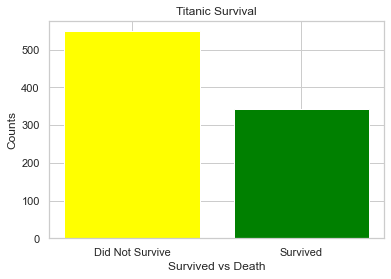

In [1010]:
#make barplot
plt.bar(['Did Not Survive','Survived'],[train_df['Survived'].value_counts()[0], 
                                        train_df['Survived'].value_counts()[1]],
       color = ['yellow', 'green'])
plt.title('Titanic Survival')
plt.xlabel('Survived vs Death')
plt.ylabel('Counts')

Text(0, 0.5, 'Fare')

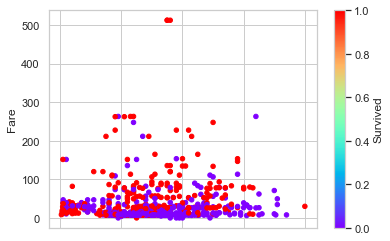

In [1011]:
#make scatterplot

train_df.plot.scatter('Age', 'Fare', c='Survived', cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Fare')

Text(0, 0.5, 'Counts')

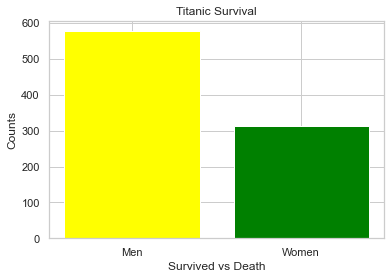

In [1012]:
#make barplot
plt.bar(['Men','Women'],[train_df.groupby('Sex').count()['Survived'][1], 
                         train_df.groupby('Sex').count()['Survived'][0]],
       color = ['yellow', 'green'])
plt.title('Titanic Survival')
plt.xlabel('Survived vs Death')
plt.ylabel('Counts')


Text(0.5, 1.0, 'Histogram of Genders survived')

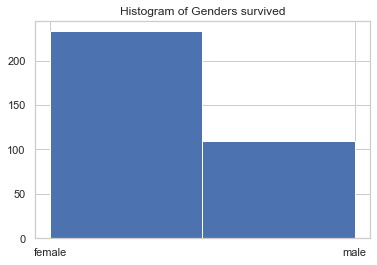

In [1013]:
#make histogram
plt.hist(train_df[train_df['Survived'] == 1]['Sex'], bins = 2)
plt.title('Histogram of Genders survived')

In [1014]:
#make pie chart/make ratios
class1 = train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1][1] / train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1].sum()
class2 = train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1][2] / train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1].sum()
class3 = train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1][3] / train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1].sum()



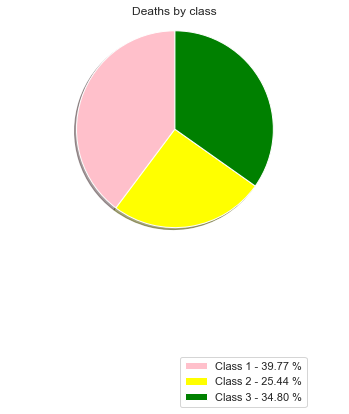

In [1015]:
x =  ['Class 1', 'Class 2', 'Class 3']
sizes = [class1, class2, class3]
percent = [class1*100, class2*100, class3*100]
colors = ['pink', 'yellow', 'green', 'blue', 'purple', 'red', 'silver', 'orange', 'black', 'brown']
explode = (0, 0, 0, 0, 0, 0,0,0,0,0)  # explode 1st slice
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
# Plot
plt.title("Deaths by class")
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="lower left", bbox_to_anchor=(0.5,-0.80))
plt.axis('equal')
plt.show()

In [1016]:
#check for NA values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1017]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

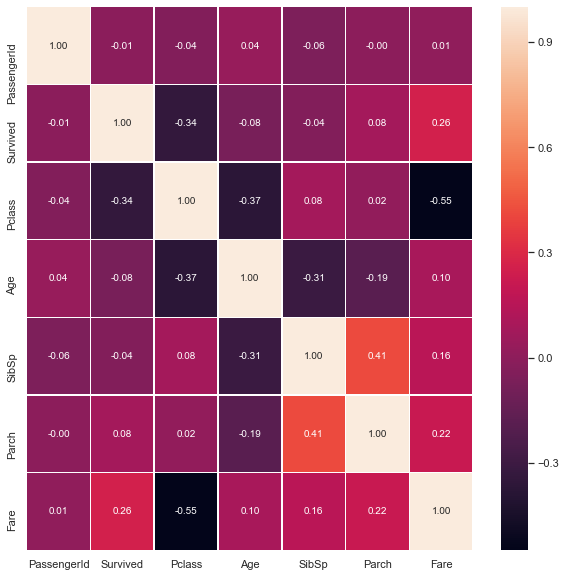

In [1018]:
#imputing age 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

In [1019]:
#compute median
medagetrain = train_df.groupby(['Pclass', 'SibSp']).median()
medagetrain

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [1020]:
#compute median of every column
medagetest = test_df.groupby(['Pclass', 'SibSp']).median()
medagetest

PassengerId   Age  Parch       Fare
Pclass SibSp                                     
1      0           1088.0  39.0    0.0   42.50000
       1           1109.5  46.0    0.0   82.06250
       2            969.0  55.0    0.0   51.47920
       3            945.0  28.0    2.0  263.00000
2      0           1117.5  27.0    0.0   13.00000
       1           1139.0  29.0    0.0   26.00000
       2           1077.5  21.0    0.5   31.50000
3      0           1095.5  24.0    0.0    7.82920
       1           1084.0  20.0    1.0   15.24580
       2           1059.0  19.5    0.0   21.67920
       3           1281.0  29.0    1.0   21.07500
       4           1076.0  11.5    2.0   30.25625
       5           1032.0  10.0    2.0   46.90000
       8           1166.0  14.5    2.0   69.55000

In [1021]:
#This function is a case of if else's to impute age by median age of subgroups, .loc finds exact index from above groupby
#functions
def impute_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [1022]:
#Fill in NA for Age and 
train_df['Age'] = train_df['Age'].fillna(impute_age(train_df, medagetrain))
test_df['Age'] = test_df['Age'].fillna(impute_age(test_df, medagetest))

In [1023]:
#Check missing values again for both data sets; we see age is taken care of
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1024]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1025]:
#Next we have to fill in missing values for cabin; we can fill this in with O
train_df['Cabin'] = train_df['Cabin'].fillna('O')
test_df['Cabin'] = test_df['Cabin'].fillna('O')

In [1026]:
#We check again and we see Cabin has been filled
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [1027]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [1028]:
#We can deal with Fare by using mean imputation to fill NA value for Fsre for test
test_df['Fare'] = test_df['Fare'].fillna(np.mean(test_df['Fare']))

In [1029]:
#test is all fixed
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [1030]:
#Now we deal with Embarked; we fill it with the mode of the column S
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [1031]:
#Next we want to fix Column Cabin to only show the number; for this we can use a lambda function
train_df["Cabin"]=train_df["Cabin"].map(lambda x: x[0])
test_df["Cabin"]=test_df["Cabin"].map(lambda x: x[0])

In [1032]:
train_df['Cabin'].head()

0    O
1    C
2    O
3    C
4    O
Name: Cabin, dtype: object

In [1033]:
#We see that has been fixed; encode features
def cabin_assignment(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)

def embark_assignment(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0)


sex_map={"male":1,"female":0}
train_df["Sex"]=train_df["Sex"].map(sex_map)
test_df["Sex"]=test_df["Sex"].map(sex_map)

In [1034]:
#use functions on both test and train
cabin_assignment(train_df)
embark_assignment(train_df)

In [1035]:
cabin_assignment(test_df)
embark_assignment(test_df)

In [1036]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Cabin A        891 non-null int64
Cabin B        891 non-null int64
Cabin C        891 non-null int64
Cabin D        891 non-null int64
Cabin E        891 non-null int64
Cabin F        891 non-null int64
Cabin G        891 non-null int64
Cabin T        891 non-null int64
Embarked S     891 non-null int64
Embarked C     891 non-null int64
dtypes: float64(2), int64(16), object(4)
memory usage: 153.3+ KB


In [1037]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Cabin A        418 non-null int64
Cabin B        418 non-null int64
Cabin C        418 non-null int64
Cabin D        418 non-null int64
Cabin E        418 non-null int64
Cabin F        418 non-null int64
Cabin G        418 non-null int64
Cabin T        418 non-null int64
Embarked S     418 non-null int64
Embarked C     418 non-null int64
dtypes: float64(2), int64(15), object(4)
memory usage: 68.7+ KB


In [1038]:
#Make new feature which is total siblings, spouse, parents etc.
train_df['Fammemb'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fammemb'] = test_df['SibSp'] + test_df['Parch'] + 1

In [1039]:
#We are now ready for training; We should drop off features which we do not think are necessary
train_df.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)
test_df.drop(["Name","Ticket","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)

In [1040]:
#see end of data set
train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,Fammemb
886,0,2,1,27.0,13.00,0,0,0,0,0,0,0,0,1,0,1
887,1,1,0,19.0,30.00,0,1,0,0,0,0,0,0,1,0,1
888,0,3,0,25.0,23.45,0,0,0,0,0,0,0,0,1,0,4
889,1,1,1,26.0,30.00,0,0,1,0,0,0,0,0,0,1,1
890,0,3,1,32.0,7.75,0,0,0,0,0,0,0,0,0,0,1


In [1041]:
#make copy
training_df1=train_df.copy()
test_df1=test_df.copy()

In [1042]:
#Next save response variable and drop from training set
x = training_df1.drop(['Survived'], 1)
y = training_df1["Survived"]

In [1043]:
x.shape, y.shape

((891, 15), (891,))

In [1044]:
#we want to split training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape, x_test.shape

((712, 15), (179, 15))

In [1045]:
#check head after split
x_train.head()

,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,Fammemb
140,3,0,25.0,15.2458,0,0,0,0,0,0,0,0,0,1,3
439,2,1,31.0,10.5000,0,0,0,0,0,0,0,0,1,0,1
817,2,1,31.0,37.0042,0,0,0,0,0,0,0,0,0,1,3
378,3,1,20.0,4.0125,0,0,0,0,0,0,0,0,0,1,1
491,3,1,21.0,7.2500,0,0,0,0,0,0,0,0,1,0,1


In [1046]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [1088]:
#custom functions
def acc_score(model, x_train, y_train):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

def confusion_matrix_model(model_used, x_test, y_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [1101]:
def aucscore(model,x_test, y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model,x_test, y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [1102]:
#time for training
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(log_reg, x_train, y_train)))
confusion_matrix_model(log_reg, x_train, y_train)



Accuracy: 0.7964050034472571


,Predicted Dead,Predicted Survived
Actual Dead,0.86,0.14
Actual Survived,0.28,0.72


In [1103]:
#print formula coefficients as well as intercept
print(log_reg.coef_)

[[-0.76052213 -2.53601257 -0.03843836  0.00352584  0.57820546  0.25173305
  -0.08023567  0.79841343  1.53569731  0.88820831 -0.01408867 -0.11883063
  -0.28490761  0.02850785 -0.21112623]]


In [1104]:
print(log_reg.intercept_)

[4.25970065]


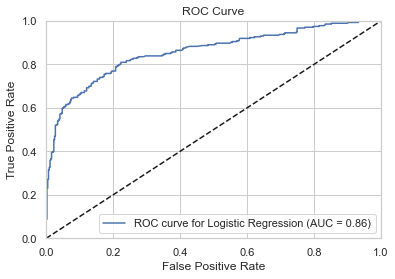

In [1109]:
#see ROC curve
plt_roc_curve("Logistic Regression", log_reg, x_train, y_train, has_proba=True)

In [1110]:
print(log_reg.coef_)

[[-0.76052213 -2.53601257 -0.03843836  0.00352584  0.57820546  0.25173305
  -0.08023567  0.79841343  1.53569731  0.88820831 -0.01408867 -0.11883063
  -0.28490761  0.02850785 -0.21112623]]


In [1111]:
print(log_reg.intercept_)

[4.25970065]


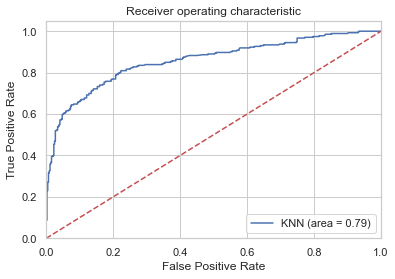

In [1113]:
logit_roc_auc = roc_auc_score(y_train, log_reg.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN')
plt.show()

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

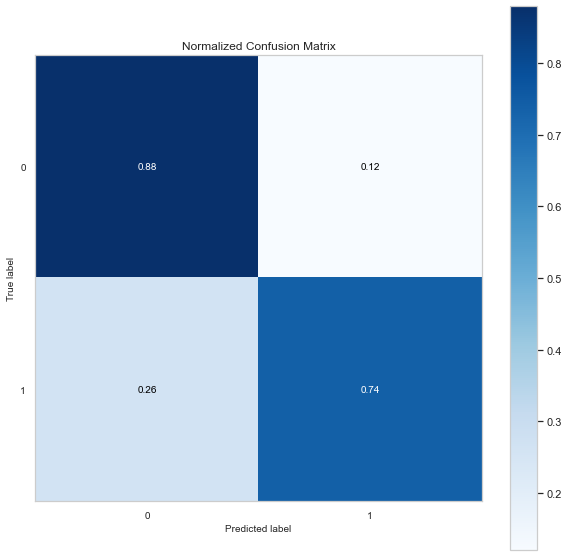

In [1057]:
skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True, figsize=(10,10))


In [1155]:
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(x_train,y_train)
print(aucscore(SVC_rbf, x_train, y_train,has_proba=False))
print("Accuracy: " + str(acc_score(SVC_rbf, x_train, y_train)))
confusion_matrix_model(SVC_rbf, x_train, y_train)


0.7336479010738692
Accuracy: 0.6558652614990643


,Predicted Dead,Predicted Survived
Actual Dead,0.92,0.08
Actual Survived,0.74,0.26


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

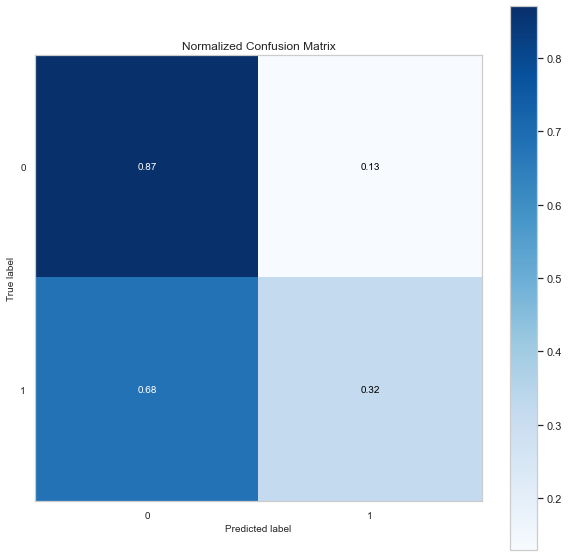

In [1136]:
skplt.metrics.plot_confusion_matrix(y_train, SVC_rbf.predict(x_train),normalize=True, figsize=(10,10))

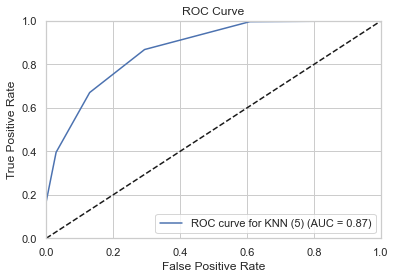

In [1141]:
plt_roc_curve("KNN (5)" ,KNN,x_train, y_train,has_proba=True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

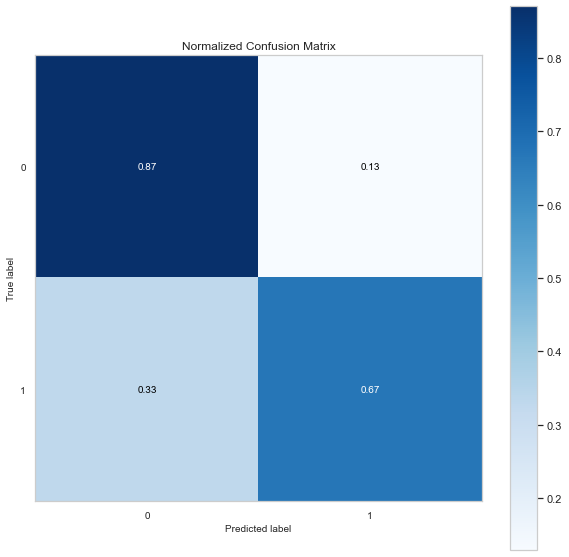

In [1134]:
skplt.metrics.plot_confusion_matrix(y_train, KNN.predict(x_train),normalize=True, figsize=(10,10))

In [1132]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
print(aucscore(KNN, x_train, y_train, has_proba=True))
print("Accuracy: " + str(acc_score(KNN, x_train, y_train)))
confusion_matrix_model(KNN, x_train, y_train)

0.8720618788955918
Accuracy: 0.7037525854427262


,Predicted Dead,Predicted Survived
Actual Dead,0.87,0.13
Actual Survived,0.33,0.67


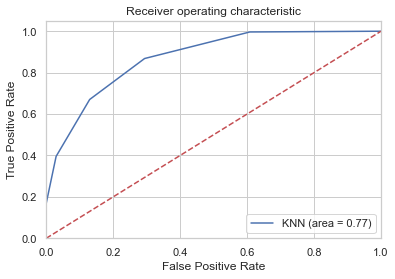

In [1143]:
logit_roc_auc = roc_auc_score(y_train, KNN.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, KNN.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN')
plt.show()

In [1144]:

Classifiers=["Logistic Regression","Support Vector Machine","K-Nearest Neighbours"]
Acc=[acc_score(x, x_train, y_train) for x in [log_reg,SVC_rbf,KNN]]
auc_scores_prob=[aucscore(x, x_train, y_train, has_proba=True) for x in [log_reg,KNN]]
auc_scores_noprob=[aucscore(x, x_train, y_train, has_proba=False) for x in [SVC_rbf]]
auc_scores= [auc_scores_prob[0],auc_scores_noprob[0], auc_scores_prob[1]]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.796405,0.833150
1,Support Vector Machine,0.655865,0.733648
2,K-Nearest Neighbours,0.703753,0.872062


In [1127]:
#same thing for test data; see confusion matrix etc.
log_reg=LogisticRegression()
log_reg.fit(x_test,y_test)
print("Accuracy: " + str(acc_score(log_reg, x_test, y_test)))
print(aucscore(log_reg, x_test, y_test, has_proba=True))
print(log_reg.coef_)
print(log_reg.intercept_)

SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(x_test,y_test)
print(aucscore(SVC_rbf, x_test, y_test,has_proba=False))
print("Accuracy: " + str(acc_score(SVC_rbf, x_test, y_test)))


KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_test,y_test)
print(aucscore(KNN,x_test, y_test,has_proba=True))
print("Accuracy: " + str(acc_score(KNN, x_test, y_test)))


Classifiers=["Logistic Regression","Support Vector Machine","K-Nearest Neighbours"]
Acc=[acc_score(x, x_test, y_test) for x in [log_reg,SVC_rbf,KNN]]
auc_scores_prob=[aucscore(x, x_test, y_test, has_proba=True) for x in [log_reg,KNN]]
auc_scores_noprob=[aucscore(x,x_test, y_test, has_proba=False) for x in [SVC_rbf]]
auc_scores= [auc_scores_prob[0],auc_scores_noprob[0], auc_scores_prob[1]]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

Accuracy: 0.7761904761904762
0.8923583662714099
[[-0.65354275 -2.39527367 -0.01744501  0.00883051  0.          0.82555266
   0.53338634  1.25170458 -0.0621017   0.70826016 -0.3959501   0.
   0.30292944  1.017721   -0.21256538]]
[2.4272679]
0.7977602108036891
Accuracy: 0.703015873015873
0.9055994729907773
Accuracy: 0.7646031746031746


,Classifier,Accuracy,AUC
0,Logistic Regression,0.776190,0.892358
1,Support Vector Machine,0.703016,0.797760
2,K-Nearest Neighbours,0.764603,0.905599


In [1130]:
print(log_reg.coef_)

[[-0.65354275 -2.39527367 -0.01744501  0.00883051  0.          0.82555266
   0.53338634  1.25170458 -0.0621017   0.70826016 -0.3959501   0.
   0.30292944  1.017721   -0.21256538]]


In [1131]:
print(log_reg.intercept_)

[2.4272679]


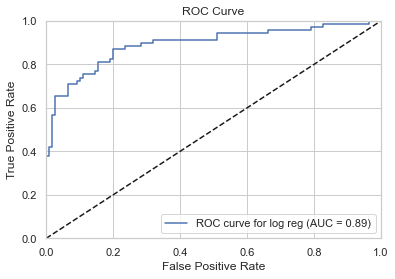

In [1148]:
plt_roc_curve("log reg",log_reg, x_test, y_test, has_proba=True)

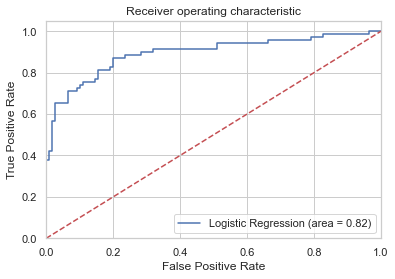

In [1149]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

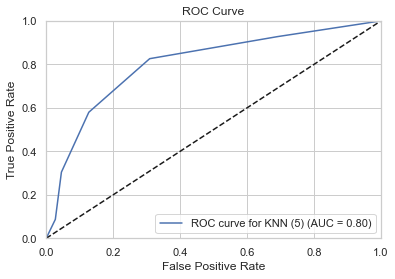

In [1145]:
#test ROC curve
plt_roc_curve("KNN (5)",KNN, x_test, y_test,has_proba=True)

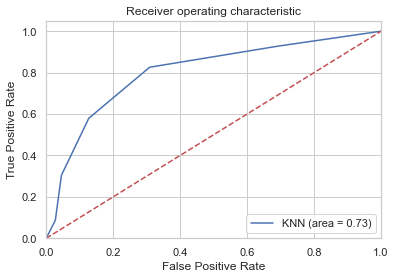

In [1147]:

logit_roc_auc = roc_auc_score(y_test, KNN.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN')
plt.show()

In [1166]:
confusion_matrix_model(log_reg, x_test, y_test)

,Predicted Dead,Predicted Survived
Actual Dead,0.89,0.11
Actual Survived,0.25,0.75


In [1167]:
confusion_matrix_model(SVC_rbf, x_test, y_test)

,Predicted Dead,Predicted Survived
Actual Dead,0.95,0.05
Actual Survived,0.62,0.38


In [1168]:
confusion_matrix_model(KNN, x_test, y_test)

,Predicted Dead,Predicted Survived
Actual Dead,0.87,0.13
Actual Survived,0.42,0.58


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

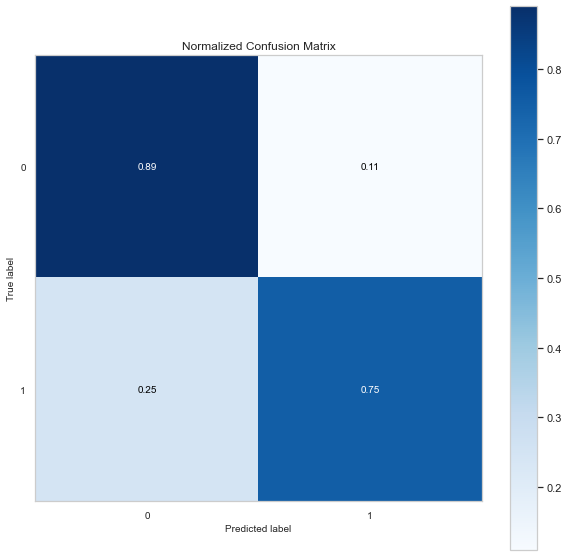

In [1076]:
skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True, figsize=(10,10))

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

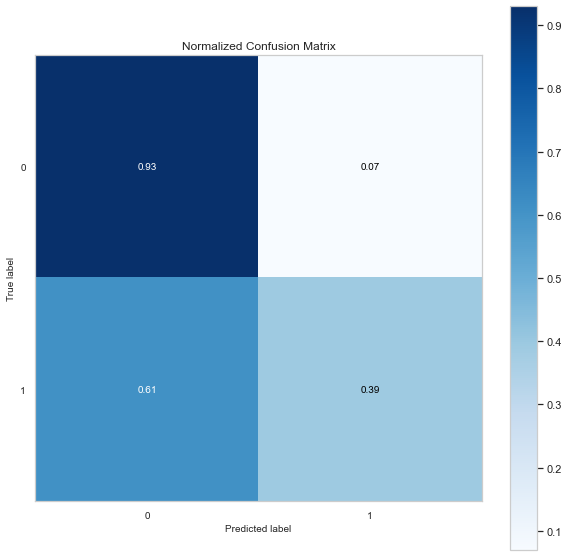

In [1077]:
skplt.metrics.plot_confusion_matrix(y_test, SVC_rbf.predict(x_test),normalize=True, figsize=(10,10))

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

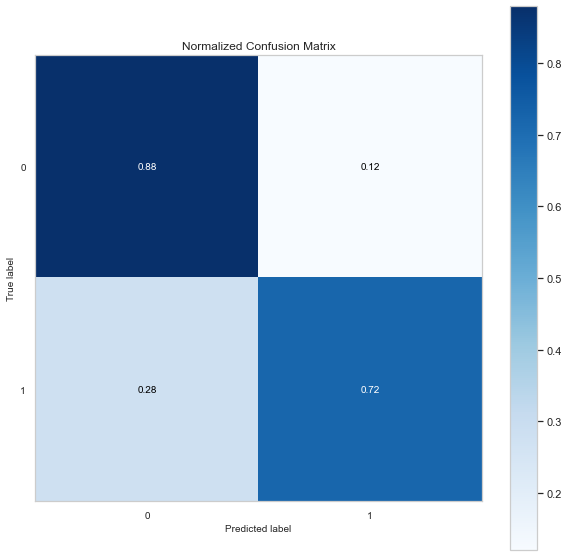

In [1078]:
skplt.metrics.plot_confusion_matrix(y_test, KNN.predict(x_test),normalize=True, figsize=(10,10))

In [1157]:
#find right parameters for best results for lunear regression
parameters = {"class_weight": ["None", "balanced"], 
              "max_iter": [25,50,75,100],
              "penalty": ["l1", "l2", "elasticnet", "none"], 
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
             }

In [1080]:
grid_cv = GridSearchCV(log_reg, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

In [1081]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

Our optimized Logistic Regression model is:


LogisticRegression(class_weight='None', max_iter=50)

In [1082]:
logreg_clf_GSCV = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_clf_GSCV.fit(x_train, y_train)


LogisticRegression(class_weight='None', max_iter=50, penalty='none')

In [1159]:
print("Accuracy: " + str(acc_score(logreg_clf_GSCV, x_train, y_train)))
confusion_matrix_model(logreg_clf_GSCV, x_train, y_train)

Accuracy: 0.7851669457303261


,Predicted Dead,Predicted Survived
Actual Dead,0.86,0.14
Actual Survived,0.30,0.70


In [1161]:
grid_cv = GridSearchCV(log_reg, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_test, y_test)

In [1162]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

Our optimized Logistic Regression model is:


LogisticRegression(class_weight='None', max_iter=75, penalty='none')

In [1163]:
logreg_clf_GSCV = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=75,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_clf_GSCV.fit(x_train, y_train)

LogisticRegression(class_weight='None', max_iter=75, penalty='none')

In [1165]:
print("Accuracy: " + str(acc_score(logreg_clf_GSCV, x_test, y_test)))
confusion_matrix_model(logreg_clf_GSCV, x_test, y_test)

Accuracy: 0.7763492063492063


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.26,0.74
